In [1]:
# import the necessary packages
from tensorflow.keras.datasets import mnist
from imutils import build_montages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf

# Loss function - binary crossentropy

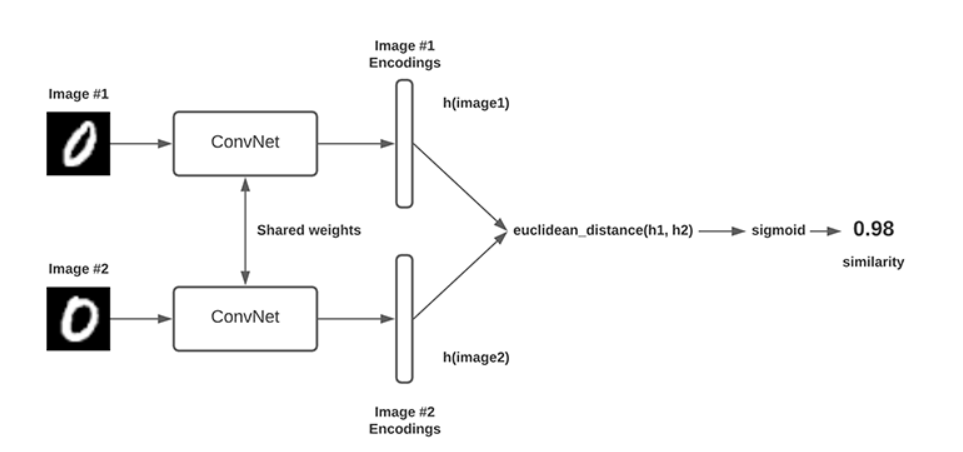

## Loading data

### CAVIARa

In [ ]:
path = '/content/drive/MyDrive/Person Recognition/CAVIARa'
names = os.listdir(path)
labels = []
data = []
sizes = []
for i, name in enumerate(names):
  print(i/len(names))
  label = int(name[:4])
  labels.append(label)
  image = Image.open(path+'/'+name)
  data.append(image)
  size = image.size
  sizes.append(size)

0.0
0.000819672131147541
0.001639344262295082
0.002459016393442623
0.003278688524590164
0.004098360655737705
0.004918032786885246
0.005737704918032787
0.006557377049180328
0.007377049180327869
0.00819672131147541
0.009016393442622951
0.009836065573770493
0.010655737704918032
0.011475409836065573
0.012295081967213115
0.013114754098360656
0.013934426229508197
0.014754098360655738
0.01557377049180328
0.01639344262295082
0.01721311475409836
0.018032786885245903
0.018852459016393444
0.019672131147540985
0.020491803278688523
0.021311475409836064
0.022131147540983605
0.022950819672131147
0.023770491803278688
0.02459016393442623
0.02540983606557377
0.02622950819672131
0.027049180327868853
0.027868852459016394
0.028688524590163935
0.029508196721311476
0.030327868852459017
0.03114754098360656
0.031967213114754096
0.03278688524590164
0.03360655737704918
0.03442622950819672
0.03524590163934426
0.036065573770491806
0.036885245901639344
0.03770491803278689
0.038524590163934426
0.03934426229508197
0.

In [ ]:
len(data)

1220

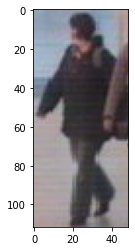

In [ ]:
plt.imshow(data[0])

### Size selection

In [ ]:
widths = [size[0] for size in sizes]
heights = [size[1] for size in sizes]

(array([ 88., 335., 284., 180., 138.,  92.,  63.,  24.,  13.,   3.]),
 array([16. , 21.9, 27.8, 33.7, 39.6, 45.5, 51.4, 57.3, 63.2, 69.1, 75. ]),
 <a list of 10 Patch objects>)

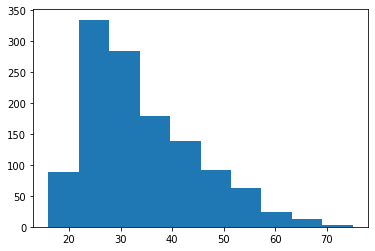

In [ ]:
plt.hist(widths)

(array([ 46., 392., 175., 149., 109.,  76.,  88.,  84.,  69.,  32.]),
 array([ 39. ,  50.1,  61.2,  72.3,  83.4,  94.5, 105.6, 116.7, 127.8,
        138.9, 150. ]),
 <a list of 10 Patch objects>)

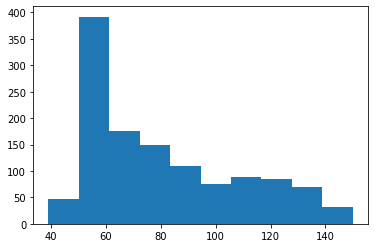

In [ ]:
plt.hist(heights)

In [ ]:
from collections import Counter
w = Counter(widths)
h = Counter(heights)
print(w.most_common()[0][0], h.most_common()[0][0])

25 58


In [ ]:
w.most_common()[:5]

[(25, 68), (28, 61), (23, 59), (26, 58), (27, 56)]

In [ ]:
h.most_common()[:5]

[(58, 47), (57, 47), (53, 42), (52, 42), (54, 37)]

Selected size : 28 x 56

### Resizing photos and creating dataset

In [ ]:
size = (28,56)
for i in range(len(data)):
  print(i/len(data))
  image = data[i].resize((28,56))
  image = np.array(image)
  data[i] = image

0.0
0.000819672131147541
0.001639344262295082
0.002459016393442623
0.003278688524590164
0.004098360655737705
0.004918032786885246
0.005737704918032787
0.006557377049180328
0.007377049180327869
0.00819672131147541
0.009016393442622951
0.009836065573770493
0.010655737704918032
0.011475409836065573
0.012295081967213115
0.013114754098360656
0.013934426229508197
0.014754098360655738
0.01557377049180328
0.01639344262295082
0.01721311475409836
0.018032786885245903
0.018852459016393444
0.019672131147540985
0.020491803278688523
0.021311475409836064
0.022131147540983605
0.022950819672131147
0.023770491803278688
0.02459016393442623
0.02540983606557377
0.02622950819672131
0.027049180327868853
0.027868852459016394
0.028688524590163935
0.029508196721311476
0.030327868852459017
0.03114754098360656
0.031967213114754096
0.03278688524590164
0.03360655737704918
0.03442622950819672
0.03524590163934426
0.036065573770491806
0.036885245901639344
0.03770491803278689
0.038524590163934426
0.03934426229508197
0.

In [ ]:
data = np.array(data)

In [ ]:
labels = np.array(labels)

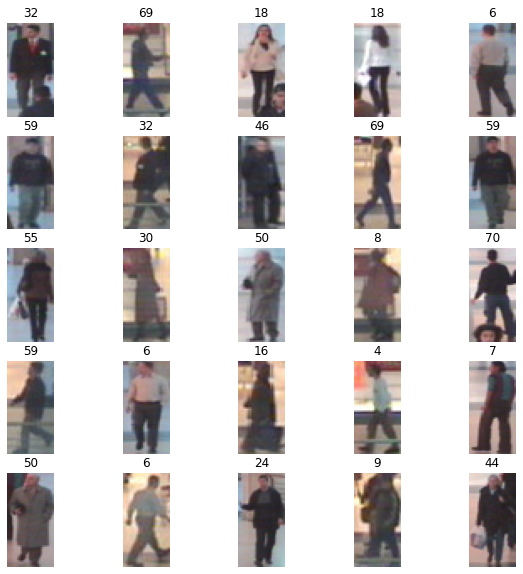

In [ ]:
make_preview(data, labels, 25)

In [ ]:
np.unique(labels, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72]),
 array([10, 10, 20, 20, 10, 20, 20, 20, 20, 10, 10, 20, 10, 10, 20, 20, 10,
        20, 20, 20, 20, 20, 20, 20, 10, 10, 20, 20, 20, 20, 20, 20, 20, 20,
        20, 20, 20, 20, 10, 20, 20, 10, 10, 20, 20, 20, 20, 10, 10, 20, 10,
        20, 10, 10, 20, 10, 20, 20, 20, 20, 10, 20, 10, 20, 20, 20, 20, 20,
        20, 20, 20, 10]))

In [ ]:
np.save('/content/drive/MyDrive/Person Recognition/caviara_dataset.npy', data)
np.save('/content/drive/MyDrive/Person Recognition/caviara_labels.npy', labels)

NameError: ignored

In [ ]:
data = np.load('/content/drive/MyDrive/Person Recognition/caviara_dataset.npy')
labels = np.load('/content/drive/MyDrive/Person Recognition/caviara_labels.npy')

### ETH

In [ ]:
def get_images_paths(input_path):
    images_paths = []
    if input_path[-1] != '/':
        input_path += '/'
    
    items = os.listdir(input_path)
    for item in items:
        extension = item[-3:]
        if extension in ['gif', 'png', 'jpg']:
            images_paths.append(input_path + item)
        else:
            # we assume that item is a directory
            images_paths.extend(get_images_paths(input_path + item))
    return images_paths

In [ ]:
path = '/content/drive/MyDrive/Person Recognition/ETH/seq1/p001/frame0001Person02.png'
splited = path.split('/')
int(splited[7][1:])

1

In [ ]:
all_data = []
all_labels = []

base_path = '/content/drive/MyDrive/Person Recognition/ETH/seq'
for i in [1,2,3]:
  path = base_path + str(i)
  print(path)
  paths = get_images_paths(path)
  data = []
  labels = []
  for j, path in enumerate(paths):
    print(j/len(paths))
    image = Image.open(path)
    image = image.resize((28,56))
    image = np.array(image)
    data.append(image)
    label = int(path.split('/')[7][1:])
    labels.append(label)
  all_data.append(data)
  all_labels.append(labels)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
0.7395940127127333
0.7397990567972114
0.7400041008816896
0.7402091449661677
0.7404141890506459
0.740619233135124
0.7408242772196022
0.7410293213040804
0.7412343653885586
0.7414394094730367
0.7416444535575148
0.741849497641993
0.7420545417264712
0.7422595858109493
0.7424646298954275
0.7426696739799057
0.7428747180643839
0.743079762148862
0.7432848062333401
0.7434898503178183
0.7436948944022965
0.7438999384867746
0.7441049825712528
0.744310026655731
0.7445150707402092
0.7447201148246874
0.7449251589091654
0.7451302029936436
0.7453352470781218
0.7455402911626
0.7457453352470781
0.7459503793315563
0.7461554234160345
0.7463604675005127
0.7465655115849907
0.7467705556694689
0.7469755997539471
0.7471806438384253
0.7473856879229034
0.7475907320073816
0.7477957760918598
0.748000820176338
0.748205864260816
0.7484109083452942
0.7486159524297724
0.7488209965142506
0.7490260405987287
0.7492310846832069
0.7494361287676851
0.74964117285

In [ ]:
for i in range(len(all_data)):
  all_data[i] = np.array(all_data[i])
  all_labels[i] = np.array(all_labels[i])

In [ ]:
for i in range(len(all_data)):
  np.save('/content/drive/MyDrive/Person Recognition/eth'+str(i)+'_labels.npy', all_labels[i])
  np.save('/content/drive/MyDrive/Person Recognition/eth'+str(i)+'_data.npy', all_data[i])

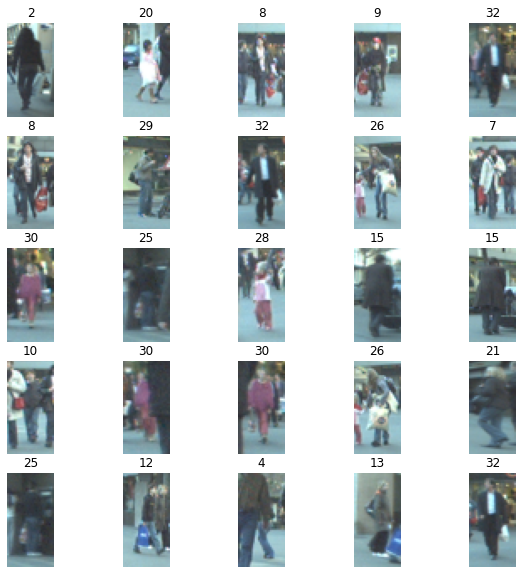

In [ ]:
make_preview(all_data[1], all_labels[1], 25)

In [ ]:
all_data[0].shape

(4877, 56, 28, 3)

### 3DPeS

In [ ]:
name = '/content/drive/MyDrive/Person Recognition/3DPeS/RGB/100_3_FRAME_26_RGB.bmp'
name.split('/')[-1].split('_')[0]

'100'

In [ ]:
base_path = '/content/drive/MyDrive/Person Recognition/3DPeS/RGB'
paths = os.listdir(base_path)

data = []
labels = []

for i, path in enumerate(paths):
    print(i/len(paths))
    path = base_path + '/' + path
    image = Image.open(path)
    image = image.resize((28,56))
    image = np.array(image)
    data.append(image)
    label = int(path.split('/')[-1].split('_')[0])
    labels.append(label)

0.0
0.0009881422924901185
0.001976284584980237
0.0029644268774703555
0.003952569169960474
0.004940711462450593
0.005928853754940711
0.00691699604743083
0.007905138339920948
0.008893280632411068
0.009881422924901186
0.010869565217391304
0.011857707509881422
0.012845849802371542
0.01383399209486166
0.014822134387351778
0.015810276679841896
0.016798418972332016
0.017786561264822136
0.018774703557312252
0.019762845849802372
0.020750988142292492
0.021739130434782608
0.022727272727272728
0.023715415019762844
0.024703557312252964
0.025691699604743084
0.0266798418972332
0.02766798418972332
0.02865612648221344
0.029644268774703556
0.030632411067193676
0.03162055335968379
0.03260869565217391
0.03359683794466403
0.03458498023715415
0.03557312252964427
0.036561264822134384
0.037549407114624504
0.038537549407114624
0.039525691699604744
0.040513833992094864
0.041501976284584984
0.042490118577075096
0.043478260869565216
0.044466403162055336
0.045454545454545456
0.046442687747035576
0.0474308300395256

In [ ]:
data = np.array(data)
labels = np.array(labels)

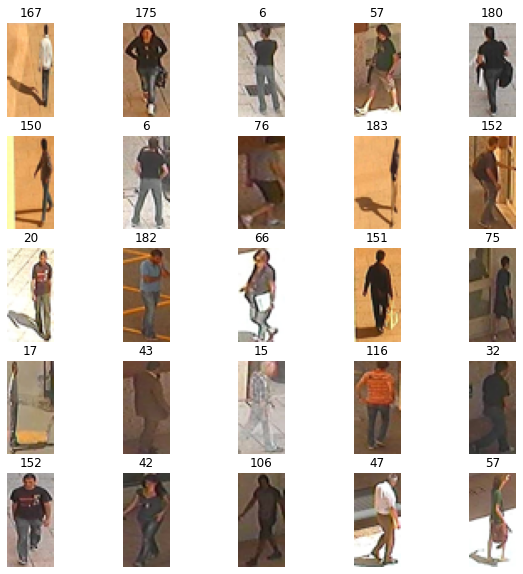

In [ ]:
make_preview(data, labels, 25)

In [ ]:
np.save('/content/drive/MyDrive/Person Recognition/3dpes_labels.npy', labels)
np.save('/content/drive/MyDrive/Person Recognition/3dpes_data.npy', data)

### Combining datasets

In [ ]:
data1 = np.load('/content/drive/MyDrive/Person Recognition/caviara_dataset.npy')
labels1 = np.load('/content/drive/MyDrive/Person Recognition/caviara_labels.npy')

data2 = np.load('/content/drive/MyDrive/Person Recognition/eth0_data.npy')
labels2 = np.load('/content/drive/MyDrive/Person Recognition/eth0_labels.npy')

data3 = np.load('/content/drive/MyDrive/Person Recognition/eth1_data.npy')
labels3 = np.load('/content/drive/MyDrive/Person Recognition/eth1_labels.npy')

data4 = np.load('/content/drive/MyDrive/Person Recognition/eth2_data.npy')
labels4 = np.load('/content/drive/MyDrive/Person Recognition/eth2_labels.npy')

data5 = np.load('/content/drive/MyDrive/Person Recognition/3dpes_data.npy')
labels5 = np.load('/content/drive/MyDrive/Person Recognition/3dpes_labels.npy')

In [ ]:
indices = np.argsort(np.unique(labels5, return_counts=True)[1])

In [ ]:
np.unique(labels5, return_counts=True)[0][indices]

array([139,  79,  91, 159, 164,  65, 115,  34,  37,  39, 110, 109, 108,
        61, 105,  49,  95,  58,  52,  89,  24, 154, 169,  21, 170, 197,
        87, 190, 187, 186, 126, 100, 106, 188, 136, 146,  88, 114, 132,
       131, 129, 120, 127,  85,  94,  84,  86,  83,  96,  90,  82,  92,
        93, 104, 168, 141, 140, 138, 137, 133, 149, 128, 151,  97, 153,
       156, 165, 167,  80, 111, 107, 203, 102, 123, 112,  72,  77,  78,
        35,  33,  32,  31,  30,  29,  28,  27,  26,  25,  38,  23, 175,
       176, 178, 179, 180, 183,  12, 185, 189, 196, 201, 174,  40,  36,
        43,  75, 172,  73, 142,  71,  70,  69,  68,  66,  64,  42,  62,
        63,  57,  56,  55,  54,  53,  51,  45,  59,  46,  50,  48,  47,
       202, 147, 163, 181, 184, 144, 204,  76, 135, 134,  99, 130, 125,
        15,  74, 113, 166, 117, 162,  22,  98,  19, 157, 121, 161, 118,
       124, 116,  11, 182, 194, 193, 119, 171, 152, 122, 192, 148, 150,
       198, 155, 143, 195,   9,   8,   7, 199,  18, 191, 145, 20

In [ ]:
plt.imshow()

In [ ]:
sum = 0
for labels in [labels1, labels2, labels3, labels4, labels5]:
  sum += len(np.unique(labels))
print(sum)

411


In [ ]:
import copy
labels = None
i = 1000
for l in [labels1, labels2, labels3, labels4, labels5]:
  unique = np.unique(l)
  print(len(unique))
  for j in unique:
    l = np.where(l == j, i, l)
    print(j, 'to', i)
    i += 1
  if labels is None:
    labels = l
  else:
    labels = np.concatenate([labels, l], axis=0)
np.unique(labels)

72
1 to 1000
2 to 1001
3 to 1002
4 to 1003
5 to 1004
6 to 1005
7 to 1006
8 to 1007
9 to 1008
10 to 1009
11 to 1010
12 to 1011
13 to 1012
14 to 1013
15 to 1014
16 to 1015
17 to 1016
18 to 1017
19 to 1018
20 to 1019
21 to 1020
22 to 1021
23 to 1022
24 to 1023
25 to 1024
26 to 1025
27 to 1026
28 to 1027
29 to 1028
30 to 1029
31 to 1030
32 to 1031
33 to 1032
34 to 1033
35 to 1034
36 to 1035
37 to 1036
38 to 1037
39 to 1038
40 to 1039
41 to 1040
42 to 1041
43 to 1042
44 to 1043
45 to 1044
46 to 1045
47 to 1046
48 to 1047
49 to 1048
50 to 1049
51 to 1050
52 to 1051
53 to 1052
54 to 1053
55 to 1054
56 to 1055
57 to 1056
58 to 1057
59 to 1058
60 to 1059
61 to 1060
62 to 1061
63 to 1062
64 to 1063
65 to 1064
66 to 1065
67 to 1066
68 to 1067
69 to 1068
70 to 1069
71 to 1070
72 to 1071
83
1 to 1072
2 to 1073
3 to 1074
4 to 1075
5 to 1076
6 to 1077
7 to 1078
8 to 1079
9 to 1080
10 to 1081
11 to 1082
12 to 1083
13 to 1084
14 to 1085
15 to 1086
16 to 1087
17 to 1088
18 to 1089
19 to 1090
20 to 1091


array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
       1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1143, 1144, 1145, 1146, 1147, 1148, 1149, 11

In [ ]:
data = np.concatenate([data1, data2, data3, data4, data5], axis=0)

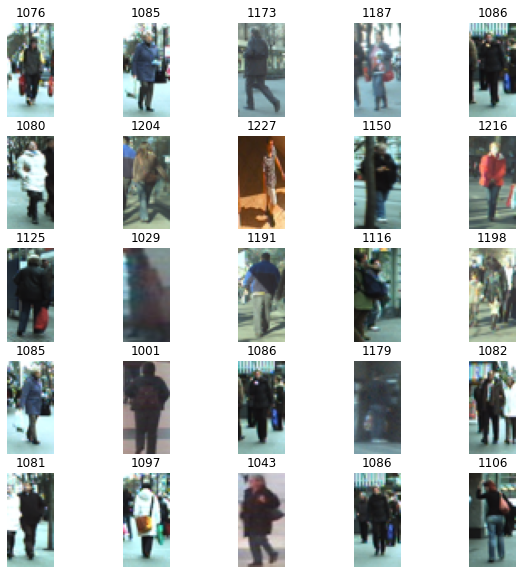

In [ ]:
make_preview(data, labels, 25)

In [ ]:
np.save('/content/drive/MyDrive/Person Recognition/stacked_data.npy', data)
np.save('/content/drive/MyDrive/Person Recognition/stacked_labels.npy', labels)

## Functions

In [ ]:
random_classes = np.random.choice(np.unique(labels), size=25, replace=False)

In [ ]:
random_classes

array([1000, 1338, 1295, 1089, 1285, 1361, 1069, 1107, 1277, 1391, 1276,
       1406, 1322, 1056, 1006, 1206, 1024, 1345, 1002, 1078, 1326, 1102,
       1118, 1098, 1209])

In [ ]:
anchor_indices = np.where(labels == random_classes[0])[0]

In [ ]:
anchors = np.random.choice(anchor_indices, size=2, replace=False)
anchors

array([ 928, 1089])

In [ ]:
anchors[0]

928

In [ ]:
indices = np.where(labels == 1338)[0]
indices

array([9917, 9918, 9919, 9920])

In [ ]:
index = np.random.choice(indices, size=1)[0]
index

9917

In [ ]:
anchor[0].shape

(56, 28, 3)

In [ ]:
np.full((9, 56, 28, 3), anchor[0]).shape

(9, 56, 28, 3)

In [ ]:
a = np.array((1,2,3))
b = np.array((2,3,4))
np.column_stack((a,b)).shape


(3, 2)

In [ ]:
def make_oneshot_pairs(anchors, support_sets):
  k, n, h, w, c = len(support_sets), len(support_sets[0]), anchors[0].shape[0], anchors[0].shape[1], anchors[0].shape[2]
  pairs = None
  for anchor, support_set in zip(anchors, support_sets):
    anchor_part = np.full((n, h, w, c), anchor)
    pair = np.hstack([anchor_part, support_set]).reshape((n, 2, h, w, c))
    if pairs is None:
      pairs = pair
    else:
      pairs = np.row_stack([pairs, pair])
  return pairs.reshape(k, n, 2, h, w, c)

In [ ]:
path = '/content/drive/MyDrive/Person Recognition/output/siamese_model3'
model = tf.keras.models.load_model(path)

In [ ]:
np.unique(test_y, return_counts=True)

(array([1001, 1007, 1009, 1011, 1015, 1026, 1041, 1046, 1058, 1059, 1063,
        1068, 1076, 1085, 1086, 1088, 1089, 1092, 1095, 1098, 1102, 1103,
        1107, 1117, 1119, 1120, 1121, 1134, 1144, 1145, 1151, 1153, 1156,
        1164, 1169, 1182, 1184, 1187, 1192, 1196, 1202, 1205, 1206, 1211,
        1212, 1219, 1232, 1234, 1240, 1257, 1258, 1260, 1264, 1265, 1275,
        1280, 1281, 1283, 1294, 1295, 1320, 1322, 1323, 1325, 1335, 1340,
        1345, 1354, 1355, 1356, 1357, 1361, 1365, 1370, 1372, 1382, 1384,
        1388, 1399, 1405, 1407, 1408]),
 array([ 10,  20,  10,  20,  20,  20,  10,  20,  20,  20,  20,  20,  51,
         62,  60,  87,  18,  32, 226,  88,  30,  75,  60,  25, 113,  67,
         34,  39,  52,  58,  15,  36,  18,  46, 206,  35,  41,  78,  50,
         65,  41,  84,  33,  63,  63,  15,   5,  13,   4,   4,   4,   4,
          2,   4,   2,   4,   4,   4,   4,   4,   2,   4,   6,   2,   5,
          5,   5,   5,  11,   3,   5,   4,   9,   6,   2,   4,   4,   8,
    

In [ ]:
random_classes = np.random.choice(np.unique(labels), size=10, replace=False)
random_classes

array([1113, 1214, 1220, 1088, 1284, 1188, 1410, 1231, 1399, 1395])

In [ ]:
def make_oneshot_data(data, labels, N, K):
  anchors = []
  support_sets = []
  for k in range(K):
    random_classes = np.random.choice(np.unique(labels), size=N, replace=False)
    anchor_indices = np.where(labels == random_classes[0])[0]
    anchor_indices = np.random.choice(anchor_indices, size=2, replace=False)
    anchor = anchor_indices[0]
    anchor = data[anchor]
    support_set = [anchor_indices[1]]
    for i in random_classes[1:]:
      indices = np.where(labels == i)[0]
      index = np.random.choice(indices, size=1)[0]
      support_set.append(index)
    support_set = data[support_set]
    anchors.append(anchor)
    support_sets.append(support_set)

  anchors = np.array(anchors)
  support_sets = np.array(support_sets)
    
  return anchors, support_sets

In [ ]:
int(17.5)

17

In [ ]:
idx = np.where(test_y == 1349)[0]
test_y = np.delete(test_y, idx, axis=0)
test_x = np.delete(test_x, idx, axis=0)

In [ ]:
binary_model = tf.keras.models.load_model('/content/drive/MyDrive/Person Recognition/output/siamese_model5')

Number of classes: 2
Binary result:
89.60000000000001
Triplet result:
89.2


Number of classes: 4
Binary result:
78.8
Triplet result:
88.0


Number of classes: 6
Binary result:
64.8
Triplet result:
73.2


Number of classes: 8
Binary result:
60.4
Triplet result:
72.0


Number of classes: 10
Binary result:
59.199999999999996
Triplet result:
76.4


Number of classes: 12
Binary result:
58.4
Triplet result:
70.8


Number of classes: 14
Binary result:
54.400000000000006
Triplet result:
66.8


Number of classes: 16
Binary result:
45.2
Triplet result:
64.0


Number of classes: 18
Binary result:
48.4
Triplet result:
61.6


Number of classes: 20
Binary result:
44.800000000000004
Triplet result:
57.99999999999999


Number of classes: 22
Binary result:
44.0
Triplet result:
54.800000000000004


Number of classes: 24
Binary result:
40.0
Triplet result:
53.2


Number of classes: 26
Binary result:
37.6
Triplet result:
48.4


Number of classes: 28
Binary result:
36.8
Triplet result:
53.2




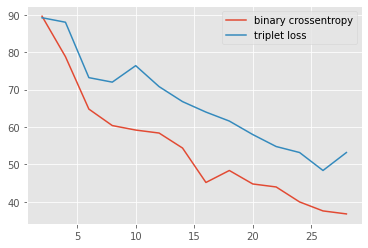

In [ ]:
Ns = [2 * i for i in range(1,15)]
K = 250
binary_results = []
triplet_results = []
for N in Ns:
  print('Number of classes:', N)
  anchors, support_sets = make_oneshot_data(test_x, test_y, N, K)
  print('Binary result:')
  result = make_oneshot_test_binary(binary_model, anchors, support_sets)
  binary_results.append(result)
  print('Triplet result:')
  result = make_oneshot_test_triplet(model, anchors, support_sets)
  triplet_results.append(result)
  print('\n')

plt.figure()
plt.plot(Ns, binary_results)
plt.plot(Ns, triplet_results)
plt.legend(['binary crossentropy', 'triplet loss'])

Number of classes: 2
Binary result:
96.0
Triplet result:
98.0


Number of classes: 4
Binary result:
74.0
Triplet result:
86.0


Number of classes: 6
Binary result:
72.0
Triplet result:
74.0


Number of classes: 8
Binary result:
78.0
Triplet result:
74.0


Number of classes: 10
Binary result:
62.0
Triplet result:
57.99999999999999


Number of classes: 12
Binary result:
52.0
Triplet result:
64.0


Number of classes: 14
Binary result:
46.0
Triplet result:
60.0


Number of classes: 16
Binary result:
50.0
Triplet result:
66.0


Number of classes: 18
Binary result:
32.0
Triplet result:
50.0


Number of classes: 20
Binary result:
40.0
Triplet result:
54.0


Number of classes: 22
Binary result:
54.0
Triplet result:
62.0


Number of classes: 24
Binary result:
48.0
Triplet result:
66.0


Number of classes: 26
Binary result:
38.0
Triplet result:
56.00000000000001


Number of classes: 28
Binary result:
30.0
Triplet result:
46.0




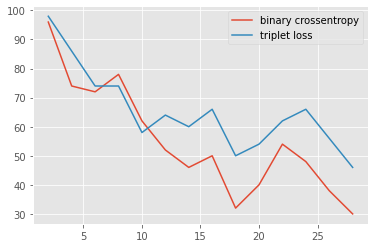

In [ ]:
Ns = [2 * i for i in range(1,15)]
K = 50
binary_results = []
triplet_results = []
for N in Ns:
  print('Number of classes:', N)
  anchors, support_sets = make_oneshot_data(test_x, test_y, N, K)
  print('Binary result:')
  result = make_oneshot_test_binary(binary_model, anchors, support_sets)
  binary_results.append(result)
  print('Triplet result:')
  result = make_oneshot_test_triplet(model, anchors, support_sets)
  triplet_results.append(result)
  print('\n')

plt.figure()
plt.plot(Ns, binary_results)
plt.plot(Ns, triplet_results)
plt.legend(['binary crossentropy', 'triplet loss'])

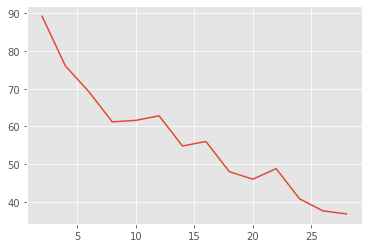

In [ ]:
plt.figure()
plt.plot(Ns, results)

In [ ]:
def make_oneshot_test_binary(model, anchors, support_sets):
    pairs = make_oneshot_pairs(anchors, support_sets)
    n_correct = 0
    for pair in pairs:
      preds = model.predict([normalize(pair[:,0]), normalize(pair[:,1])])
      if np.argmax(preds) == 0:
        n_correct += 1
    result = n_correct / len(support_sets) * 100
    print(result)
    return result

In [ ]:
make_oneshot_test(model, anchor, support_set)

100.0


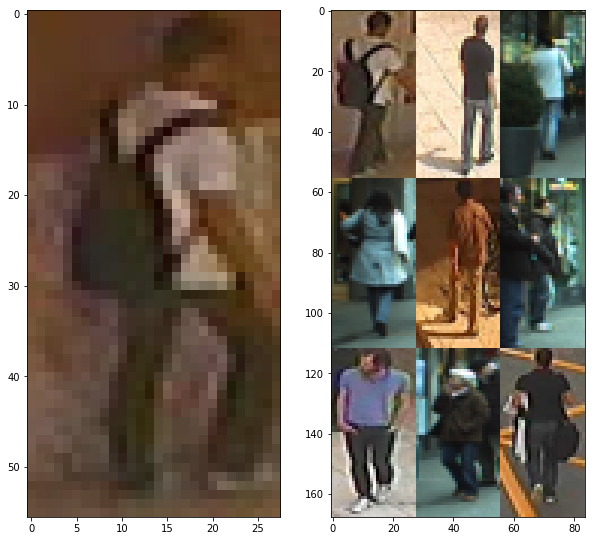

In [ ]:
anchor, support_set = make_oneshot_data(data, labels, 9, 2)
oneshot_preview(anchor[0], support_set[0], 3)

In [ ]:
def oneshot_preview(anchor, support_set, w):
  rows = len(support_set) // w
  support_image = None
  for row in range(rows):
    images = support_set[row*w:(row+1)*w]
    images = np.hstack(images)
    if support_image is None:
      support_image = images
    else:
      support_image = np.vstack([support_image, images])
  plt.figure(figsize=(10,15))
  plt.subplot(1,2,1)
  plt.imshow(anchor)
  plt.subplot(1,2,2)
  plt.imshow(support_image)

In [ ]:
def make_preview(data, labels, n):
  random_indices = np.random.choice(len(data), n, replace=False)
  plt.figure(figsize=(10,10))
  sqrt_n = int(np.sqrt(n))
  for i in range(n):
    id = random_indices[i]
    plt.subplot(sqrt_n, sqrt_n, i+1)
    plt.imshow(data[id])
    plt.title(labels[id])
    plt.axis('off')
  plt.show()

In [ ]:
def normalize(data):
  data = data / 127.5 - 1.0 
  return data

In [ ]:
def make_pairs(images, labels):
  # initialize two empty lists to hold the (image, image) pairs and
  # labels to indicate if a pair is positive or negative
  pairImages = []
  pairLabels = []
  # calculate the total number of classes present in the dataset
  # and then build a list of indexes for each class label that
  # provides the indexes for all examples with a given label
  numClasses = len(np.unique(labels))
  idx = {i : np.where(labels == i)[0] for i in np.unique(labels)}
  # loop over all images
  for idxA in range(len(images)):
    # grab the current image and label belonging to the current
    # iteration
    currentImage = images[idxA]
    label = labels[idxA]
		# randomly pick an image that belongs to the *same* class
		# label
    idxB = np.random.choice(idx[label])
    posImage = images[idxB]
		# prepare a positive pair and update the images and labels
		# lists, respectively
    pairImages.append([currentImage, posImage])
    pairLabels.append([1])
  
    # grab the indices for each of the class labels *not* equal to
		# the current label and randomly pick an image corresponding
		# to a label *not* equal to the current label
    negIdx = np.where(labels != label)[0]
    negImage = images[np.random.choice(negIdx)]
		# prepare a negative pair of images and update our lists
    pairImages.append([currentImage, negImage])
    pairLabels.append([0])
	  # return a 2-tuple of our image pairs and labels
  return (np.array(pairImages), np.array(pairLabels))

In [ ]:
def augment(image):
  if np.random.binomial(1, 0.5):
    image = np.fliplr(image)
  image = image / 127.5 - 1.0
  return image

In [ ]:
def generate_pairs(images, labels, batch_size):
  pairs = []
  pair_labels = []

  for i in range(0, batch_size):
    idx = np.random.randint(0, len(images), size=1)
    anchor = images[idx]
    y = labels[idx]

    neg_idx = np.squeeze(np.where(labels != y))
    pos_idx = np.squeeze(np.where(labels == y))
    neg_idx = np.random.choice(neg_idx, size=1)
    pos_idx = np.random.choice(pos_idx, size=1)

    negative = images[neg_idx]
    positive = images[pos_idx]

    anchor = augment(anchor)
    negative = augment(negative)
    positive = augment(positive)

    pairs.append([anchor, positive])
    pairs.append([anchor, negative])
    pair_labels.append([1])
    pair_labels.append([0])

  pairs = np.array(pairs).squeeze()
  pair_labels = np.array(pair_labels)

  return [pairs[:,0], pairs[:,1]], pair_labels#np.array(pairs), np.array(pair_labels)

In [ ]:
def pairs_generator(images, labels, batch_size):
  while True:
    x, y = generate_pairs(images, labels, batch_size)
    yield x, y

In [ ]:
def make_triplets(images, labels, batch_size=256):
  anchors = []
  positives = []
  negatives = []

  for i in range(0, batch_size):
    print(i)
    idx = np.random.randint(0, len(images), size=1)
    anchor = images[idx]
    y = labels[idx]
    neg_idx = np.squeeze(np.where(labels != y))
    pos_idx = np.squeeze(np.where(labels == y))
    neg_idx = np.random.choice(neg_idx, size=1)
    pos_idx = np.random.choice(pos_idx, size=1)

    negative = images[neg_idx]
    positive = images[pos_idx]

    anchors.append(anchor)
    positives.append(positive)
    negatives.append(negative)

  anchors = np.array(anchors).squeeze()
  positives = np.array(positives).squeeze()
  negatives = np.array(negatives).squeeze()
  return [anchors, positives, negatives]

In [ ]:
def denormalize(data):
  data = np.clip((data + 1.0) * 127.5, 0, 255).astype(np.uint8)
  return data

In [ ]:
def make_preview_pairs(pairs, labels, n):
  random_pairs = np.random.choice(len(pairs), n, replace=False)

  plt.figure(figsize=(10,10))
  for i in range(len(random_pairs)):
    idx = random_pairs[i]
    image_a = pairs[idx][0]
    image_b = pairs[idx][1]
    stacked = np.hstack([image_a, image_b])
    label = labels[idx]

    sqrt_n = np.sqrt(n)
    plt.subplot(sqrt_n, sqrt_n, i+1)
    plt.imshow(stacked)
    plt.axis('off')
    plt.title('neg' if label[0] == 0 else 'pos')
  plt.show()
  plt.tight_layout()

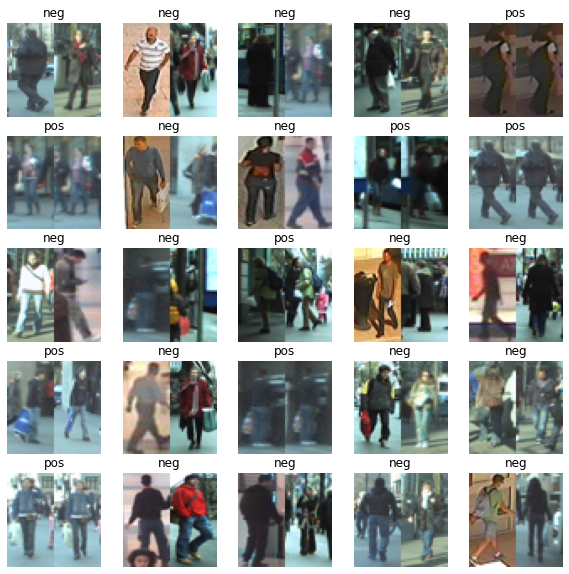

<Figure size 432x288 with 0 Axes>

In [ ]:
pairs, pair_labels = make_pairs(data, labels)
make_preview_pairs(pairs.squeeze(), pair_labels, 25)

In [ ]:
indices = np.where(labels==1158)
images = data[indices]
lab = labels[indices]
print(indices[0].shape)

(63,)


In [ ]:
make_preview(images, lab, 16)

## Model

In [ ]:
# import the necessary packages
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
# import the necessary packages
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
import numpy as np
import tensorflow as tf

In [ ]:
def build_siamese_model(inputShape, embeddingDim=48):
	# specify the inputs for the feature extractor network
	inputs = Input(inputShape)
	# define the first set of CONV => RELU => POOL => DROPOUT layers
	x = Conv2D(64, (2, 2), padding="same", activation="relu")(inputs)
	x = MaxPooling2D(pool_size=(2, 2))(x)
	x = Dropout(0.3)(x)
	# second set of CONV => RELU => POOL => DROPOUT layers
	x = Conv2D(64, (2, 2), padding="same", activation="relu")(x)
	x = MaxPooling2D(pool_size=2)(x)
	x = Dropout(0.3)(x)
 	# prepare the final outputs
	pooledOutput = GlobalAveragePooling2D()(x)
	outputs = Dense(embeddingDim)(pooledOutput)
	# build the model
	model = Model(inputs, outputs)
	# return the model to the calling function
	return model

In [ ]:
def build_siamese_model(inputShape, embeddingDim=48):
	# specify the inputs for the feature extractor network
	inputs = Input(inputShape)
	# define the first set of CONV => RELU => POOL => DROPOUT layers
	x = Conv2D(64, (2, 2), padding="same", activation="relu")(inputs)
	x = MaxPooling2D(pool_size=(2, 2))(x)
	x = Dropout(0.3)(x)
	# second set of CONV => RELU => POOL => DROPOUT layers
	x = Conv2D(64, (2, 2), padding="same", activation="relu")(x)
	x = MaxPooling2D(pool_size=2)(x)
	x = Dropout(0.3)(x)
 	# prepare the final outputs
	pooledOutput = GlobalAveragePooling2D()(x)
	outputs = Dense(embeddingDim)(pooledOutput)
	# build the model
	model = Model(inputs, outputs)
	# return the model to the calling function
	return model

In [ ]:
def euclidean_distance(vectors):
	# unpack the vectors into separate lists
	(featsA, featsB) = vectors
	# compute the sum of squared distances between the vectors
	sumSquared = K.sum(K.square(featsA - featsB), axis=1,
		keepdims=True)
	# return the euclidean distance between the vectors
	return K.sqrt(K.maximum(sumSquared, K.epsilon()))

In [ ]:
def plot_training(H, plotPath):
	# construct a plot that plots and saves the training history
	plt.style.use("ggplot")
	plt.figure()
	plt.plot(H.history["loss"], label="train_loss")
	plt.plot(H.history["val_loss"], label="val_loss")
	plt.plot(H.history["accuracy"], label="train_acc")
	plt.plot(H.history["val_accuracy"], label="val_acc")
	plt.title("Training Loss and Accuracy")
	plt.xlabel("Epoch #")
	plt.ylabel("Loss/Accuracy")
	plt.legend(loc="lower left")
	plt.savefig(plotPath)

### Preparing data

In [ ]:
len(np.unique(labels))

411

In [ ]:
random_persons = np.random.choice(np.unique(labels), 82, replace=False)

In [ ]:
train_indices, test_indices = np.isin(labels, random_persons, invert=True), np.isin(labels, random_persons)
train_x, train_y, test_x, test_y = data[train_indices], labels[train_indices], data[test_indices], labels[test_indices]
print(len(train_x), len(test_x))

8728 2109


In [ ]:
# normalizing data
train_x = normalize(train_x)
test_x = normalize(test_x)

In [ ]:
# prepare the positive and negative pairs
print("[INFO] preparing positive and negative pairs...")
train_pairs, train_labels = make_pairs(train_x, train_y)
test_pairs, test_labels = make_pairs(test_x, test_y)

[INFO] preparing positive and negative pairs...


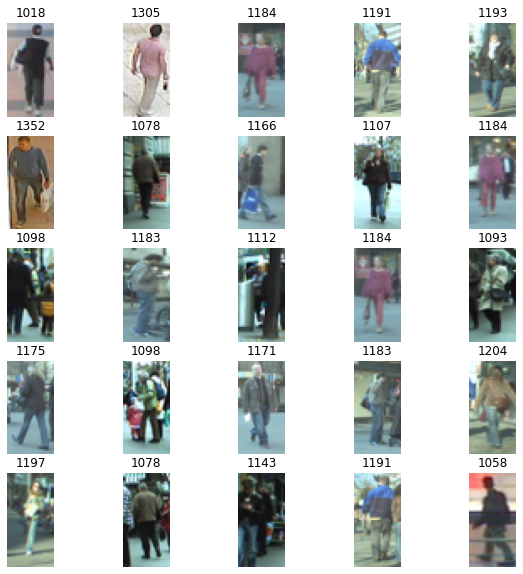

In [ ]:
make_preview(train_x, train_y, 25)

In [ ]:
make_preview_pairs(denormalize(train_pairs), train_labels, 25)

NameError: ignored

### Building model

In [ ]:
IMG_SHAPE = (56, 28, 3)

In [ ]:
# configure the siamese network
print("[INFO] building siamese network...")
imgA = Input(shape=IMG_SHAPE)
imgB = Input(shape=IMG_SHAPE)
featureExtractor = build_siamese_model(IMG_SHAPE, 128)
featsA = featureExtractor(imgA)
featsB = featureExtractor(imgB)
# finally, construct the siamese network
distance = Lambda(euclidean_distance)([featsA, featsB])
outputs = Dense(1, activation="sigmoid")(distance)
model = Model(inputs=[imgA, imgB], outputs=outputs)

[INFO] building siamese network...


In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 56, 28, 3)]  0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 56, 28, 3)]  0                                            
__________________________________________________________________________________________________
model_4 (Functional)            (None, 128)          25600       input_9[0][0]                    
                                                                 input_10[0][0]                   
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           model_4[0][0]              

In [ ]:
featureExtractor.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 56, 28, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 28, 64)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 7, 64)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 7, 64)         0   

### Training model

In [ ]:
# import the necessary packages
import os
# specify the shape of the inputs for our network
IMG_SHAPE = (56, 28, 3)
# specify the batch size and number of epochs
BATCH_SIZE = 256
EPOCHS = 300
train_steps = int(train_x.shape[0]/BATCH_SIZE)
validation_steps = int(test_x.shape[0]/BATCH_SIZE)
INIT_LR = 1e-4

In [ ]:
# compile the model
print("[INFO] compiling model...")
opt = tf.keras.optimizers.Adam(learning_rate=INIT_LR, decay=INIT_LR/EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the model
print("[INFO] training model...")
history = model.fit(
	pairs_generator(train_x, train_y, BATCH_SIZE),
	validation_data=pairs_generator(test_x, test_y, BATCH_SIZE),
  steps_per_epoch=train_steps,
  validation_steps=validation_steps,
	batch_size=BATCH_SIZE, 
	epochs=EPOCHS)

[INFO] compiling model...
[INFO] training model...
Epoch 1/300
34/34 [==============================] - 4s 105ms/step - loss: 0.6703 - accuracy: 0.5000 - val_loss: 0.6588 - val_accuracy: 0.5095
Epoch 2/300
34/34 [==============================] - 3s 100ms/step - loss: 0.6548 - accuracy: 0.5000 - val_loss: 0.6382 - val_accuracy: 0.5120
Epoch 3/300
34/34 [==============================] - 3s 101ms/step - loss: 0.6362 - accuracy: 0.5000 - val_loss: 0.6217 - val_accuracy: 0.5098
Epoch 4/300
34/34 [==============================] - 3s 102ms/step - loss: 0.6281 - accuracy: 0.5000 - val_loss: 0.6108 - val_accuracy: 0.5166
Epoch 5/300
34/34 [==============================] - 3s 103ms/step - loss: 0.6177 - accuracy: 0.5000 - val_loss: 0.6023 - val_accuracy: 0.5164
Epoch 6/300
34/34 [==============================] - 4s 105ms/step - loss: 0.6123 - accuracy: 0.5000 - val_loss: 0.5908 - val_accuracy: 0.5251
Epoch 7/300
34/34 [==============================] - 3s 101ms/step - loss: 0.6043 - accurac

In [ ]:
# define the path to the base output directory
BASE_OUTPUT = "/content/drive/MyDrive/Person Recognition/output"
# use the base output path to derive the path to the serialized
# model along with training history plot
MODEL_PATH = os.path.sep.join([BASE_OUTPUT, "siamese_model5"])
PLOT_PATH = os.path.sep.join([BASE_OUTPUT, "plot5.png"])

### Saving and evaluating

[INFO] saving siamese model...
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Person Recognition/output/siamese_model5/assets
[INFO] plotting training history...


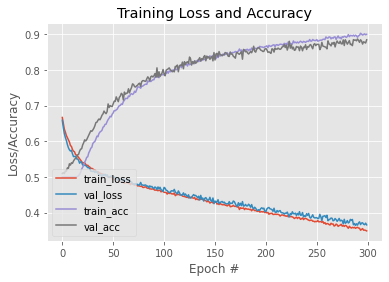

In [ ]:
# serialize the model to disk
print("[INFO] saving siamese model...")
model.save(MODEL_PATH)
# plot the training history
print("[INFO] plotting training history...")
plot_training(history, PLOT_PATH)

## Preview of model results

In [ ]:
path = '/content/drive/MyDrive/Person Recognition/output/siamese_model3'
model = tf.keras.models.load_model(path)

In [ ]:
def test_binary(model, images, labels, n, random_ids=None):
  if random_ids is None:
    random_ids = np.random.choice(len(images), size=n)
  for i in range(len(random_ids)):
    idx = random_ids[i]
    anchor = images[idx]
    label = labels[idx]

    pos_ids = np.where(labels==label)
    neg_ids = np.where(labels!=label)
    pos_id = np.random.choice(pos_ids[0], size=1)
    neg_id = np.random.choice(neg_ids[0], size=1)
    positive = images[pos_id[0]]
    negative = images[neg_id[0]]

    anchor_ = np.expand_dims(normalize(anchor), axis=0)
    positive_ = np.expand_dims(normalize(positive), axis=0)
    negative_ = np.expand_dims(normalize(negative), axis=0)

    preds_pos = model.predict([anchor_, positive_])
    preds_neg = model.predict([anchor_, negative_])

    proba_pos = preds_pos[0][0]
    proba_neg = preds_neg[0][0]

    plt.figure("Pair #{}".format(i + 1))

    plt.subplot(1, 3, 1)
    plt.imshow(positive)
    title = "{:d}, Similarity: {:.2f}".format(labels[pos_id[0]], proba_pos)
    plt.axis('off')
    plt.title(title)

    plt.subplot(1, 3, 2)
    plt.imshow(anchor)
    plt.axis('off')
    plt.title(labels[pos_id[0]])

    plt.subplot(1, 3, 3)
    plt.imshow(negative)
    plt.axis('off')
    title = "{:d}, Similarity: {:.2f}".format(labels[neg_id[0]], proba_neg)
    plt.title(title)

    plt.show()
    plt.tight_layout()


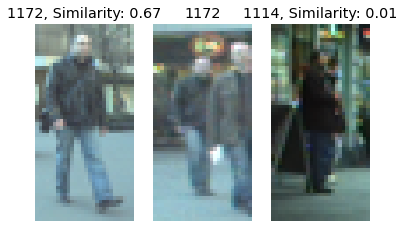

<Figure size 432x288 with 0 Axes>

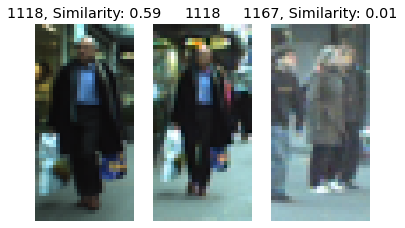

<Figure size 432x288 with 0 Axes>

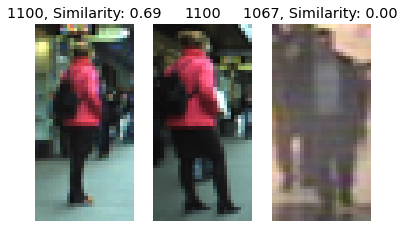

<Figure size 432x288 with 0 Axes>

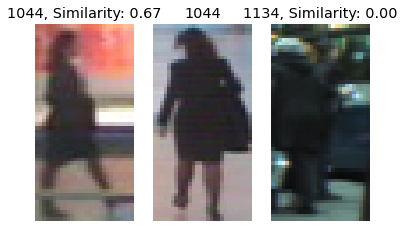

<Figure size 432x288 with 0 Axes>

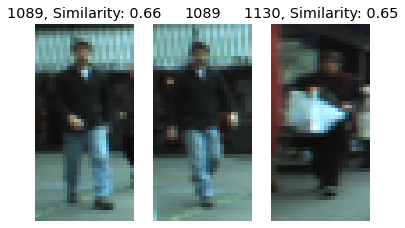

<Figure size 432x288 with 0 Axes>

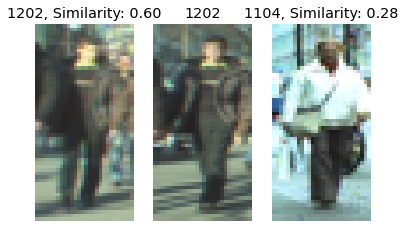

<Figure size 432x288 with 0 Axes>

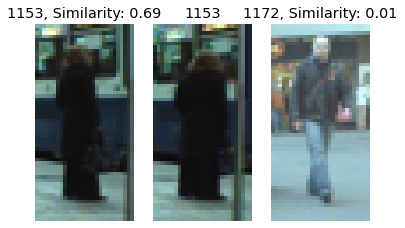

<Figure size 432x288 with 0 Axes>

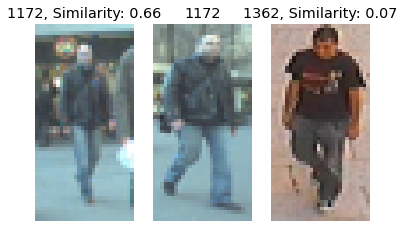

<Figure size 432x288 with 0 Axes>

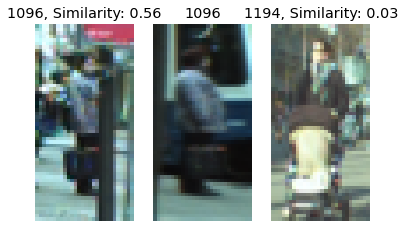

<Figure size 432x288 with 0 Axes>

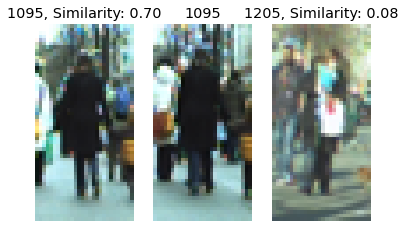

<Figure size 432x288 with 0 Axes>

In [ ]:
test_binary(test_x, test_y, 10)

(56, 28, 3)


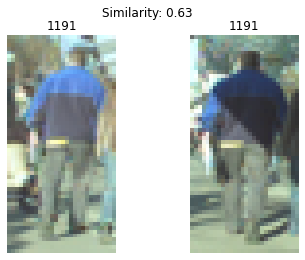

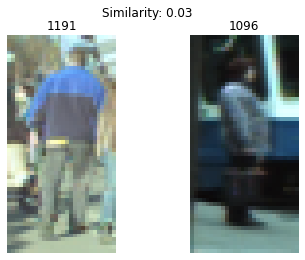

In [ ]:
#random_images = np.random.choice(len(test_x), size=(10,2))
random_id = np.random.choice(len(test_x), size=1)
#for i in range(len(random_images)):
#idxA = random_images[i][0]
#idxB = random_images[i][1]

imgA = test_x[random_id[0]]#test_x[idxA]
label = test_y[random_id[0]]
pos = np.where(test_y==label)
pos = np.random.choice(pos[0], size=1)
neg = np.where(test_y!=label)
neg = np.random.choice(neg[0], size=1)
imgB = test_x[pos[0]]#test_x[idxB]
imgC = test_x[neg[0]]

imgA_ = np.expand_dims(imgA, axis=0)
imgB_ = np.expand_dims(imgB, axis=0)
imgC_ = np.expand_dims(imgC, axis=0)
print(imgA.shape)

preds_pos = model.predict([imgA_, imgB_])
preds_neg = model.predict([imgA_, imgC_])
proba_pos = preds_pos[0][0]
proba_neg = preds_neg[0][0]

# initialize the figure
plt.figure("Pair #{}".format(i + 1))
plt.suptitle("Similarity: {:.2f}".format(proba_pos))
# show first image
plt.subplot(1,2,1)
plt.imshow(denormalize(imgA))
plt.title(test_y[random_id[0]])
plt.axis("off")
# show the second image
plt.subplot(1,2,2)
plt.imshow(denormalize(imgB))
plt.title(test_y[pos[0]])
plt.axis("off")
plt.show()

plt.figure("Pair #{}".format(i + 1))
plt.suptitle("Similarity: {:.2f}".format(proba_neg))
# show first image
plt.subplot(1,2,1)
plt.imshow(denormalize(imgA))
plt.title(test_y[random_id[0]])
plt.axis("off")
# show the second image
plt.subplot(1,2,2)
plt.imshow(denormalize(imgC))
plt.title(test_y[neg[0]])
plt.axis("off")
# show the plot
plt.show()

In [ ]:
test_pairs, test_labels = make_pairs(test_x, test_y)

In [ ]:
model.evaluate([test_pairs[:,0], test_pairs[:,1]], test_labels)

141/141 [==============================] - 1s 4ms/step - loss: 0.3672 - accuracy: 0.9063


[0.36724305152893066, 0.9063470959663391]

# Loss function - triplet loss

In [ ]:
def make_triplets(images, labels, batch_size=256):
  anchors = []
  positives = []
  negatives = []

  for i in range(0, batch_size):
    idx = np.random.randint(0, len(images), size=1)
    anchor = images[idx]
    y = labels[idx]
    neg_idx = np.squeeze(np.where(labels != y))
    pos_idx = np.squeeze(np.where(labels == y))
    neg_idx = np.random.choice(neg_idx, size=1)
    pos_idx = np.random.choice(pos_idx, size=1)

    negative = images[neg_idx]
    positive = images[pos_idx]
    anchor = augment(anchor)
    positive = augment(positive)
    negative = augment(negative)

    anchors.append(anchor)
    positives.append(positive)
    negatives.append(negative)

  anchors = np.array(anchors).squeeze()
  positives = np.array(positives).squeeze()
  negatives = np.array(negatives).squeeze()
  return [anchors, positives, negatives]

In [ ]:
def make_preview_triplets(triplets, n):
  random_triplets = np.random.choice(triplets.shape[1], n, replace=False)
  plt.figure(figsize=(20,20))
  for i in range(len(random_triplets)):
    idx = random_triplets[i]
    anc = triplets[0][idx]
    pos = triplets[1][idx]
    neg = triplets[2][idx]
    stacked = np.hstack([anc, pos, neg])

    sqrt_n = int(np.sqrt(n))
    plt.subplot(sqrt_n, sqrt_n, i+1)
    plt.imshow(stacked)
    plt.axis('off')
  plt.show()

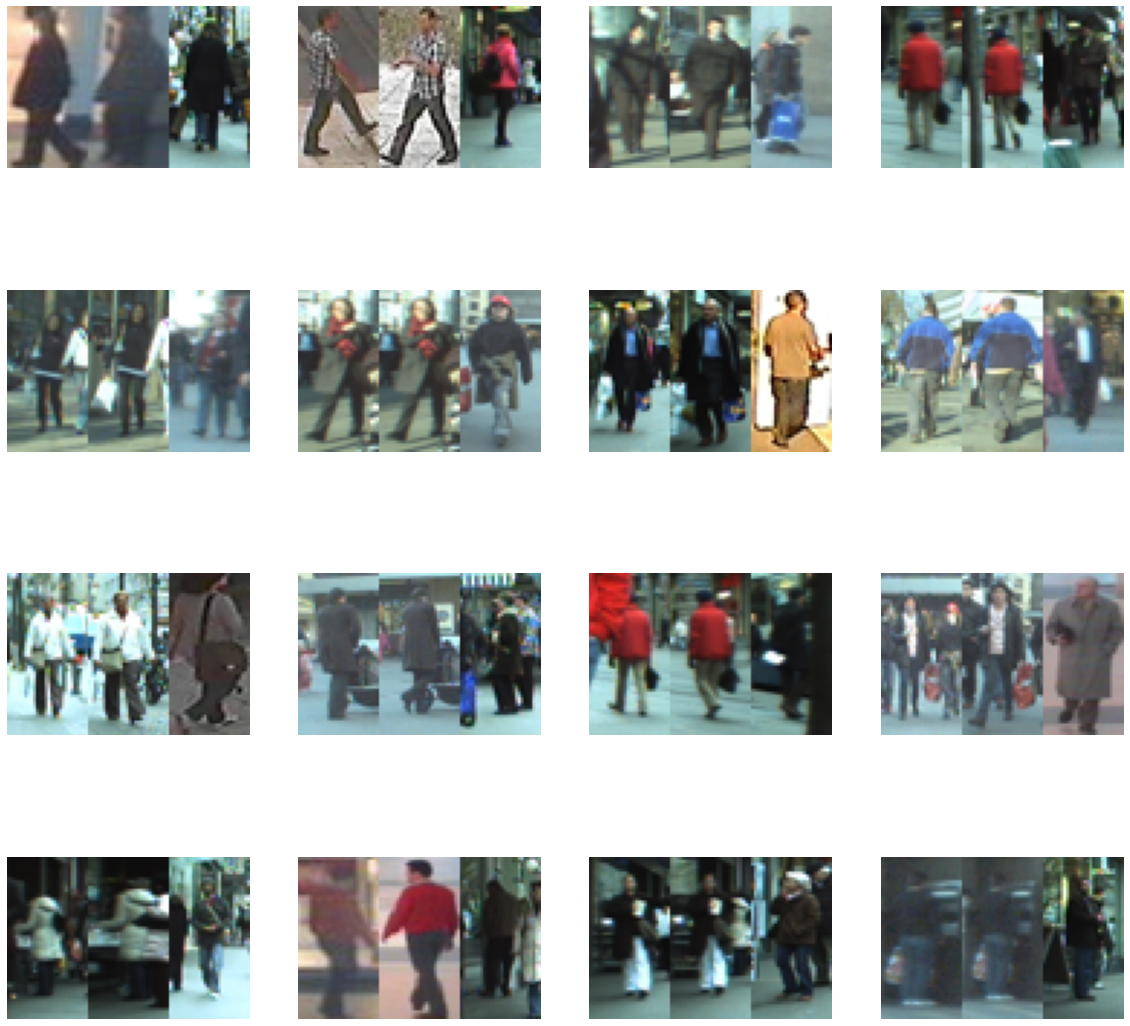

In [ ]:
make_preview_triplets(np.array(triplets), 16)

In [ ]:
# import the necessary packages
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
# import the necessary packages
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def build_siamese_model(inputShape, embeddingDim=48):
	# specify the inputs for the feature extractor network
	inputs = Input(inputShape)
	# define the first set of CONV => RELU => POOL => DROPOUT layers
	x = Conv2D(64, (2, 2), padding="same", activation="relu")(inputs)
	x = MaxPooling2D(pool_size=(2, 2))(x)
	x = Dropout(0.3)(x)
	# second set of CONV => RELU => POOL => DROPOUT layers
	x = Conv2D(64, (2, 2), padding="same", activation="relu")(x)
	x = MaxPooling2D(pool_size=2)(x)
	x = Dropout(0.3)(x)
 	# prepare the final outputs
	pooledOutput = GlobalAveragePooling2D()(x)
	outputs = Dense(embeddingDim)(pooledOutput)
	# build the model
	model = Model(inputs, outputs)
	# return the model to the calling function
	return model

In [ ]:
INPUT_SHAPE = (56, 28, 3)

In [ ]:
input_anchor = tf.keras.layers.Input(shape=INPUT_SHAPE)
input_positive = tf.keras.layers.Input(shape=INPUT_SHAPE)
input_negative = tf.keras.layers.Input(shape=INPUT_SHAPE)

features_extractor = build_siamese_model(INPUT_SHAPE, 128)

embedding_anchor = features_extractor(input_anchor)
embedding_positive = features_extractor(input_positive)
embedding_negative = features_extractor(input_negative)

output = tf.keras.layers.concatenate([embedding_anchor, embedding_positive, embedding_negative], axis=1)

model = tf.keras.models.Model([input_anchor, input_positive, input_negative], output)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 56, 28, 3)]  0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 56, 28, 3)]  0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 56, 28, 3)]  0                                            
__________________________________________________________________________________________________
model_2 (Functional)            (None, 128)          25600       input_4[0][0]                    
                                                                 input_5[0][0]              

In [ ]:
features_extractor.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 56, 28, 3)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 56, 28, 64)        832       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 28, 14, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 28, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 7, 64)         0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 7, 64)         0  

In [ ]:
alpha = 0.3

def triplet_loss(y_true, y_pred):
    anchor, positive, negative = y_pred[:,:emb_size], y_pred[:,emb_size:2*emb_size], y_pred[:,2*emb_size:]
    positive_dist = tf.reduce_mean(tf.square(anchor - positive), axis=1)
    negative_dist = tf.reduce_mean(tf.square(anchor - negative), axis=1)
    return tf.maximum(positive_dist - negative_dist + alpha, 0.)

In [ ]:
def accuracy(y_true, y_pred):
  anchor, positive, negative = y_pred[:,:emb_size], y_pred[:,emb_size:2*emb_size], y_pred[:,2*emb_size:]
  positive_dist = tf.reduce_mean(tf.square(anchor - positive), axis=1)
  negative_dist = tf.reduce_mean(tf.square(anchor - negative), axis=1)
  return K.mean((negative_dist-positive_dist)>alpha)

In [ ]:
emb_size = 128

In [ ]:
def data_generator(data, labels, batch_size=256):
    while True:
        x = make_triplets(data, labels, batch_size)
        y = np.zeros((batch_size, 3*emb_size))
        yield x, y

In [ ]:
batch_size = 256
epochs = 300
steps_per_epoch = int(train_x.shape[0]/batch_size)
validation_steps = int(test_x.shape[0]/batch_size)

model.compile(loss=triplet_loss, optimizer='adam', metrics=[accuracy])

H = model.fit(
    data_generator(train_x, train_y, batch_size),
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=data_generator(test_x, test_y, batch_size),
    validation_steps=validation_steps
)

Epoch 1/300
34/34 [==============================] - 4s 99ms/step - loss: 0.2665 - accuracy: 0.0670 - val_loss: 0.1582 - val_accuracy: 0.5005
Epoch 2/300
34/34 [==============================] - 3s 93ms/step - loss: 0.1515 - accuracy: 0.4826 - val_loss: 0.1170 - val_accuracy: 0.6392
Epoch 3/300
34/34 [==============================] - 3s 93ms/step - loss: 0.1281 - accuracy: 0.5860 - val_loss: 0.0906 - val_accuracy: 0.6460
Epoch 4/300
34/34 [==============================] - 3s 92ms/step - loss: 0.0940 - accuracy: 0.6355 - val_loss: 0.0724 - val_accuracy: 0.7207
Epoch 5/300
34/34 [==============================] - 3s 93ms/step - loss: 0.0826 - accuracy: 0.7180 - val_loss: 0.0679 - val_accuracy: 0.7549
Epoch 6/300
34/34 [==============================] - 3s 93ms/step - loss: 0.0677 - accuracy: 0.7525 - val_loss: 0.0643 - val_accuracy: 0.7734
Epoch 7/300
34/34 [==============================] - 3s 94ms/step - loss: 0.0680 - accuracy: 0.7694 - val_loss: 0.0602 - val_accuracy: 0.7749
Epoch 

In [ ]:
# define the path to the base output directory
BASE_OUTPUT = "/content/drive/MyDrive/Person Recognition/output"
# use the base output path to derive the path to the serialized
# model along with training history plot
MODEL_PATH = os.path.sep.join([BASE_OUTPUT, "siamese_model_triplet1"])
PLOT_PATH = os.path.sep.join([BASE_OUTPUT, "plot_triplet1.png"])

[INFO] saving siamese model...
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Person Recognition/output/siamese_model_triplet/assets
[INFO] plotting training history...


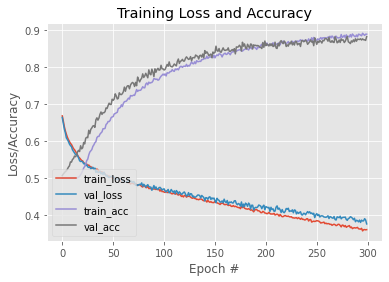

In [ ]:
# serialize the model to disk
print("[INFO] saving siamese model...")
model.save(MODEL_PATH)
# plot the training history
print("[INFO] plotting training history...")
plot_training(history, PLOT_PATH)

In [ ]:
def make_oneshot_test_triplet(model, anchors, support_sets):
    pairs = make_oneshot_pairs(anchors, support_sets)
    n_correct = 0
    for pair in pairs:
      preds = model.predict([normalize(pair[:,0]), normalize(pair[:,1]), normalize(pair[:,1])])
      anchor_embs, support_embs = preds[:,:emb_size], preds[:,emb_size:2*emb_size]
      distances = []
      for anchor_emb, support_emb in zip(anchor_embs, support_embs):
        dist = np.linalg.norm(anchor_emb - support_emb)
        distances.append(dist)
      if np.argmin(np.array(distances)) == 0:
        n_correct += 1
    result = n_correct / len(support_sets) * 100
    print(result)
    return result

In [ ]:
anchors, support_sets = make_oneshot_data(test_x, test_y, 25, 10)
make_oneshot_test_triplet(model, anchors, support_sets)

60.0


60.0

In [ ]:
path = '/content/drive/MyDrive/Person Recognition/output/siamese_model3'
binary_model = tf.keras.models.load_model(path)

In [ ]:
def test_triplet(model, images, labels, n, random_ids=None):
  if random_ids is None:
    random_ids = np.random.choice(len(images), size=n)
  for i in range(len(random_ids)):
    idx = random_ids[i]
    anchor = images[idx]
    label = labels[idx]

    pos_ids = np.where(labels==label)
    neg_ids = np.where(labels!=label)
    pos_id = np.random.choice(pos_ids[0], size=1)
    neg_id = np.random.choice(neg_ids[0], size=1)
    positive = images[pos_id[0]]
    negative = images[neg_id[0]]

    anchor_ = np.expand_dims(normalize(anchor), axis=0)
    positive_ = np.expand_dims(normalize(positive), axis=0)
    negative_ = np.expand_dims(normalize(negative), axis=0)

    y_pred = model.predict([anchor_, positive_, negative_])
    anchor_emb, positive_emb, negative_emb = y_pred[:,:emb_size], y_pred[:,emb_size:2*emb_size], y_pred[:,2*emb_size:]
    positive_dist = tf.reduce_mean(tf.square(anchor_emb - positive_emb), axis=1)
    negative_dist = tf.reduce_mean(tf.square(anchor_emb - negative_emb), axis=1)

    positive_dist = np.array(positive_dist)[0]
    negative_dist = np.array(negative_dist)[0]
    margin = negative_dist - positive_dist

    plt.figure("Pair #{}".format(i + 1))
    plt.suptitle("Margin: {:.2f}".format(margin))
    plt.subplot(1, 3, 1)
    plt.imshow(positive)
    title = "{:d}, Dist: {:.2f}".format(labels[pos_id[0]], positive_dist)
    plt.axis('off')
    plt.title(title)

    plt.subplot(1, 3, 2)
    plt.imshow(anchor)
    plt.axis('off')
    plt.title(labels[pos_id[0]])

    plt.subplot(1, 3, 3)
    plt.imshow(negative)
    plt.axis('off')
    title = "{:d}, Dist: {:.2f}".format(labels[neg_id[0]], negative_dist)
    plt.title(title)

    plt.show()
    plt.tight_layout()


In [ ]:
def test_binary(model, images, labels, n, random_ids=None):
  if random_ids is None:
    random_ids = np.random.choice(len(images), size=n)
  for i in range(len(random_ids)):
    idx = random_ids[i]
    anchor = images[idx]
    label = labels[idx]

    pos_ids = np.where(labels==label)
    neg_ids = np.where(labels!=label)
    pos_id = np.random.choice(pos_ids[0], size=1)
    neg_id = np.random.choice(neg_ids[0], size=1)
    positive = images[pos_id[0]]
    negative = images[neg_id[0]]

    anchor_ = np.expand_dims(normalize(anchor), axis=0)
    positive_ = np.expand_dims(normalize(positive), axis=0)
    negative_ = np.expand_dims(normalize(negative), axis=0)

    preds_pos = model.predict([anchor_, positive_])
    preds_neg = model.predict([anchor_, negative_])

    proba_pos = preds_pos[0][0]
    proba_neg = preds_neg[0][0]

    plt.figure("Pair #{}".format(i + 1))

    plt.subplot(1, 3, 1)
    plt.imshow(positive)
    title = "{:d}, Similarity: {:.2f}".format(labels[pos_id[0]], proba_pos)
    plt.axis('off')
    plt.title(title)

    plt.subplot(1, 3, 2)
    plt.imshow(anchor)
    plt.axis('off')
    plt.title(labels[pos_id[0]])

    plt.subplot(1, 3, 3)
    plt.imshow(negative)
    plt.axis('off')
    title = "{:d}, Similarity: {:.2f}".format(labels[neg_id[0]], proba_neg)
    plt.title(title)

    plt.show()
    plt.tight_layout()


In [ ]:
def test_models(triplet_model, binary_model, images, labels, n):
  random_ids = np.random.choice(len(images), size=n)
  for i in range(len(random_ids)):
    idx = random_ids[i]
    anchor = images[idx]
    label = labels[idx]

    pos_ids = np.where(labels==label)
    neg_ids = np.where(labels!=label)
    pos_id = np.random.choice(pos_ids[0], size=1)
    neg_id = np.random.choice(neg_ids[0], size=1)
    positive = images[pos_id[0]]
    negative = images[neg_id[0]]

    anchor_ = np.expand_dims(normalize(anchor), axis=0)
    positive_ = np.expand_dims(normalize(positive), axis=0)
    negative_ = np.expand_dims(normalize(negative), axis=0)

    y_pred = triplet_model.predict([anchor_, positive_, negative_])
    anchor_emb, positive_emb, negative_emb = y_pred[:,:emb_size], y_pred[:,emb_size:2*emb_size], y_pred[:,2*emb_size:]
    positive_dist = tf.reduce_mean(tf.square(anchor_emb - positive_emb), axis=1)
    negative_dist = tf.reduce_mean(tf.square(anchor_emb - negative_emb), axis=1)

    positive_dist = np.array(positive_dist)[0]
    negative_dist = np.array(negative_dist)[0]
    margin = negative_dist - positive_dist

    preds_pos = binary_model.predict([anchor_, positive_])
    preds_neg = binary_model.predict([anchor_, negative_])

    proba_pos = preds_pos[0][0]
    proba_neg = preds_neg[0][0]

    plt.figure("Pair #{}".format(i + 1), figsize=(15,10))
    plt.suptitle("Margin: {:.2f}".format(margin))
    plt.subplot(1, 5, 1)
    plt.imshow(positive)
    title = "{:d}, Dist: {:.2f}".format(labels[pos_id[0]], positive_dist)
    plt.axis('off')
    plt.title(title)

    plt.subplot(1, 5, 2)
    plt.imshow(negative)
    plt.axis('off')
    title = "{:d}, Dist: {:.2f}".format(labels[neg_id[0]], negative_dist)
    plt.title(title)

    plt.subplot(1, 5, 3)
    plt.imshow(anchor)
    plt.axis('off')
    plt.title(labels[pos_id[0]])

    plt.subplot(1, 5, 4)
    plt.imshow(positive)
    title = "{:d}, Similarity: {:.2f}".format(labels[pos_id[0]], proba_pos)
    plt.axis('off')
    plt.title(title)

    plt.subplot(1, 5, 5)
    plt.imshow(negative)
    title = "{:d}, Similarity: {:.2f}".format(labels[neg_id[0]], proba_neg)
    plt.axis('off')
    plt.title(title)

    plt.show()
    plt.tight_layout()

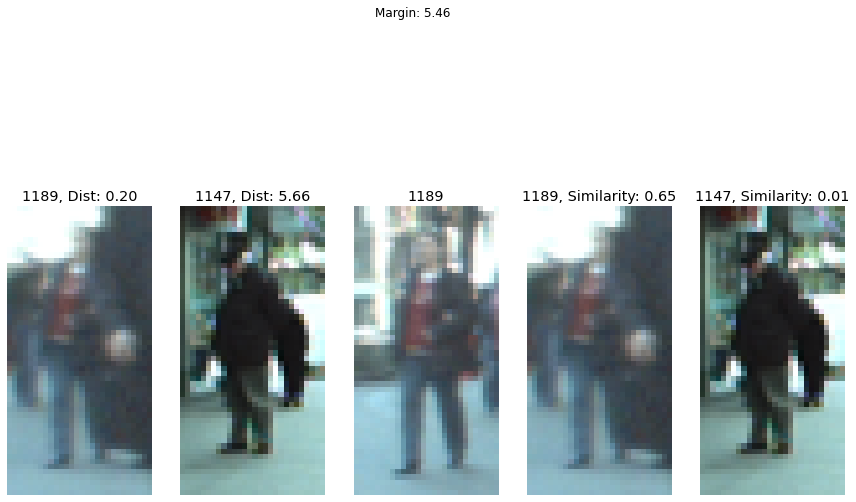

<Figure size 432x288 with 0 Axes>

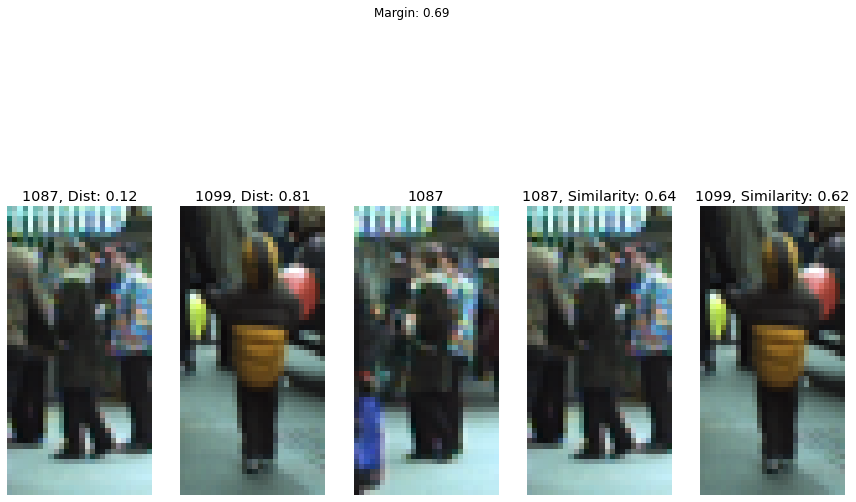

<Figure size 432x288 with 0 Axes>

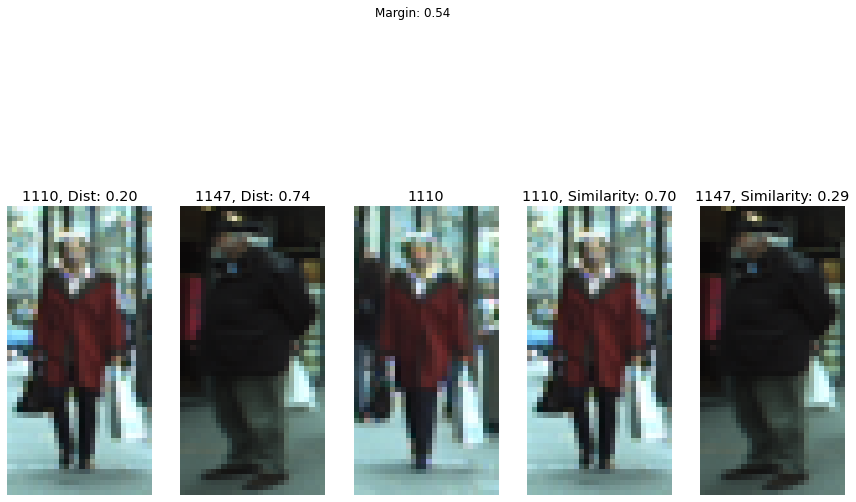

<Figure size 432x288 with 0 Axes>

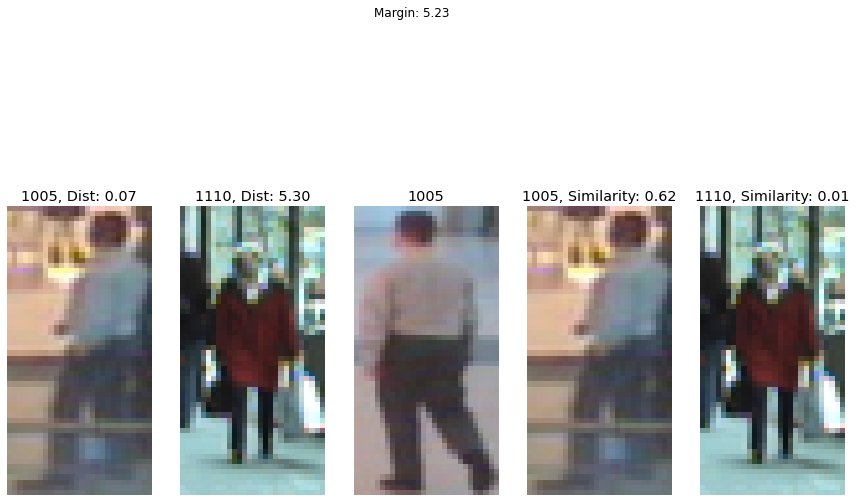

<Figure size 432x288 with 0 Axes>

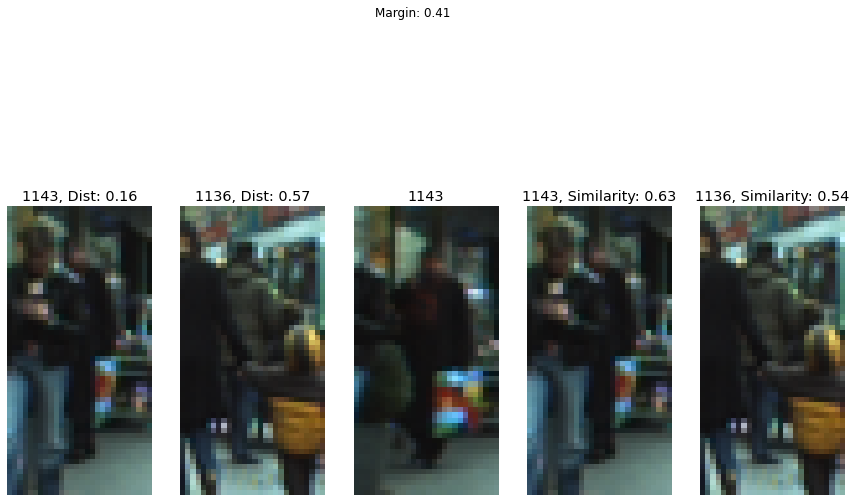

<Figure size 432x288 with 0 Axes>

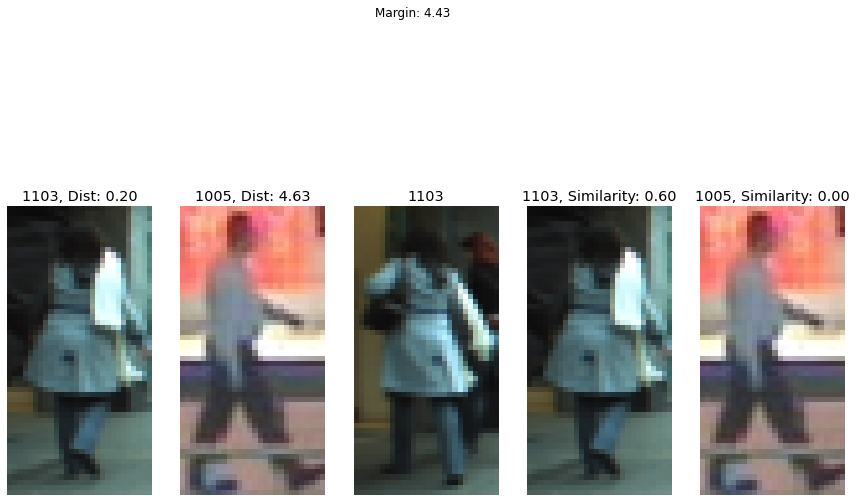

<Figure size 432x288 with 0 Axes>

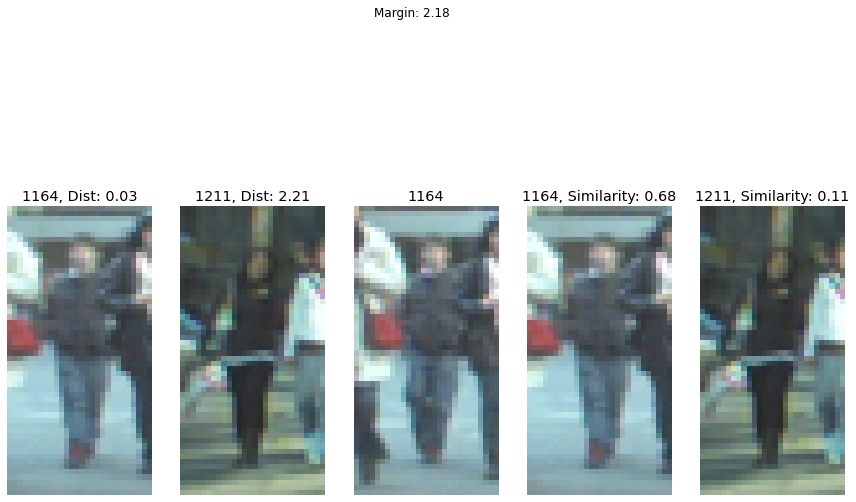

<Figure size 432x288 with 0 Axes>

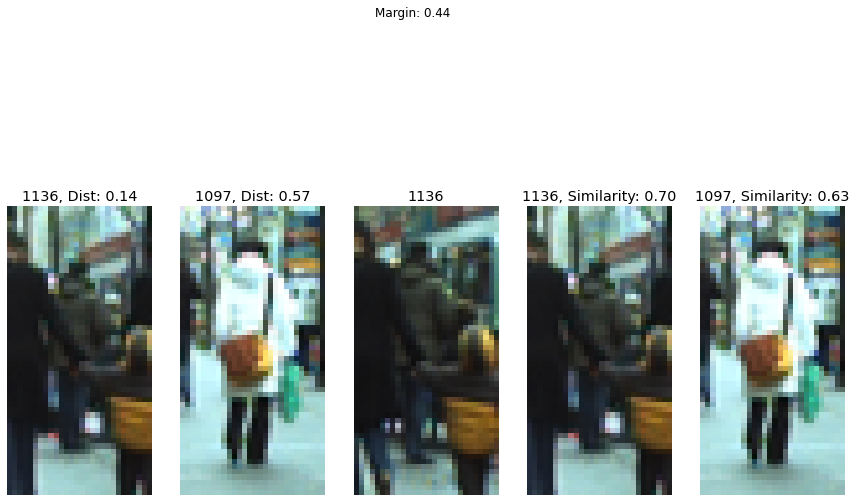

<Figure size 432x288 with 0 Axes>

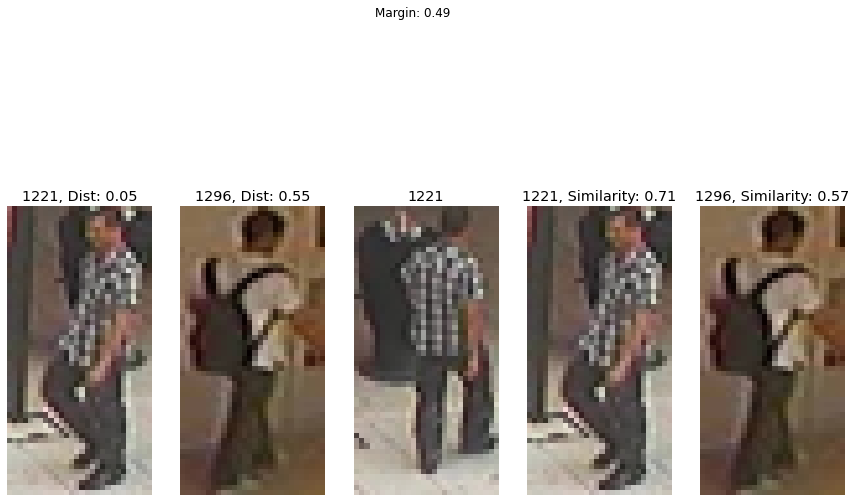

<Figure size 432x288 with 0 Axes>

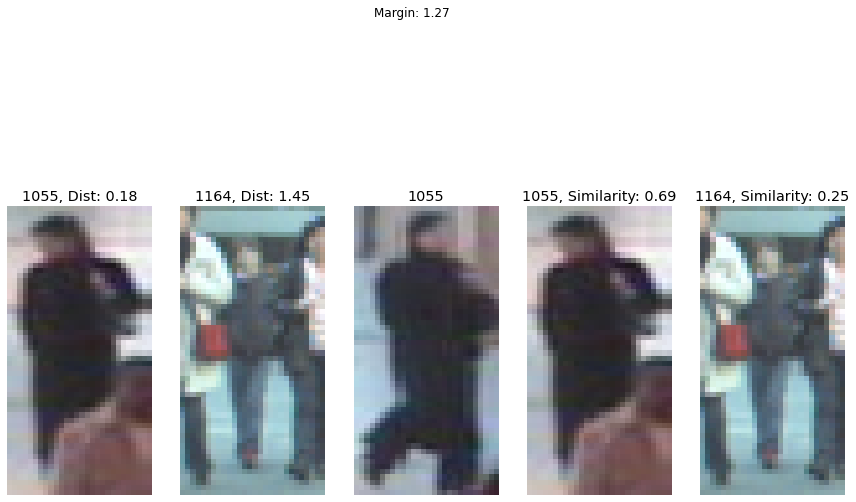

<Figure size 432x288 with 0 Axes>

In [ ]:
test_models(model, binary_model, test_x, test_y, 10)

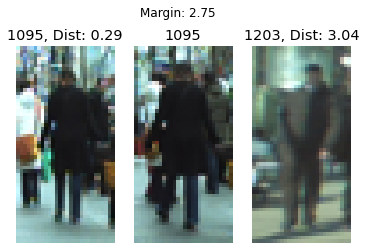

<Figure size 432x288 with 0 Axes>

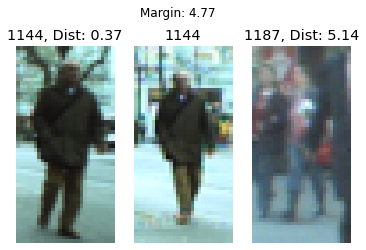

<Figure size 432x288 with 0 Axes>

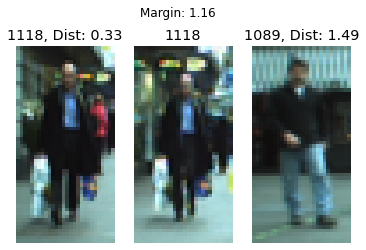

<Figure size 432x288 with 0 Axes>

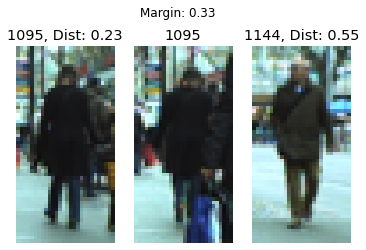

<Figure size 432x288 with 0 Axes>

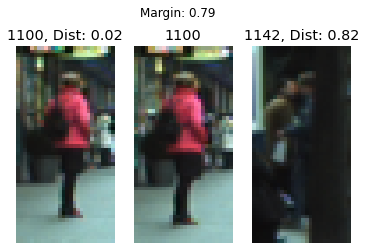

<Figure size 432x288 with 0 Axes>

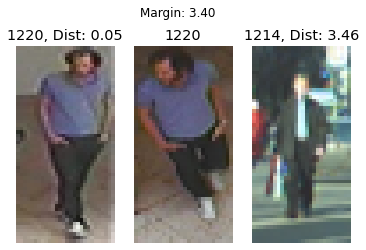

<Figure size 432x288 with 0 Axes>

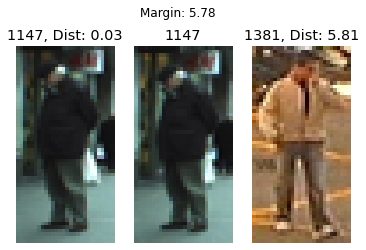

<Figure size 432x288 with 0 Axes>

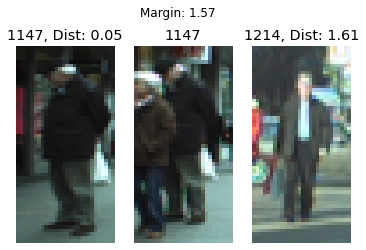

<Figure size 432x288 with 0 Axes>

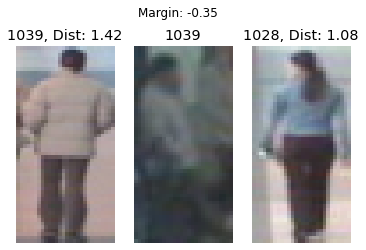

<Figure size 432x288 with 0 Axes>

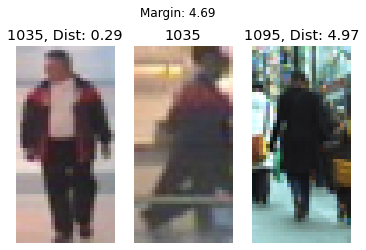

<Figure size 432x288 with 0 Axes>

In [ ]:
random_ids = np.random.choice(len(test_x), size=10)
test_triplet(model, test_x, test_y, 10, random_ids)

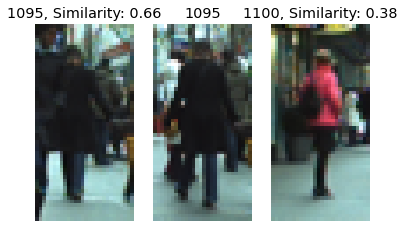

<Figure size 432x288 with 0 Axes>

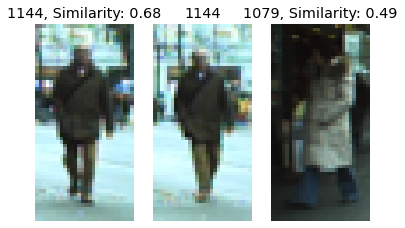

<Figure size 432x288 with 0 Axes>

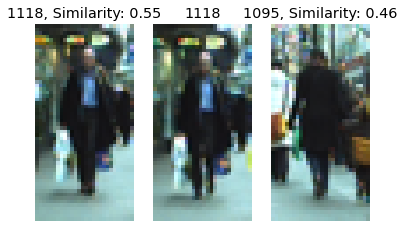

<Figure size 432x288 with 0 Axes>

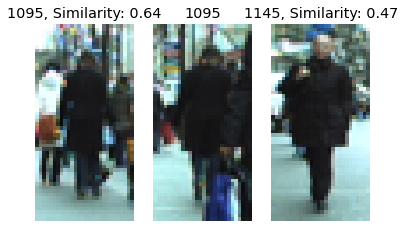

<Figure size 432x288 with 0 Axes>

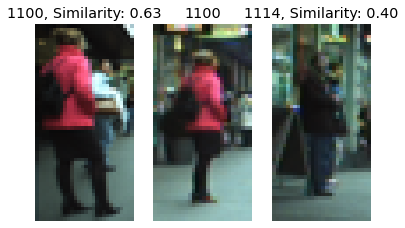

<Figure size 432x288 with 0 Axes>

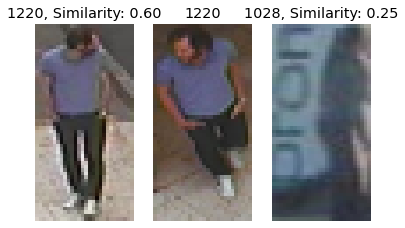

<Figure size 432x288 with 0 Axes>

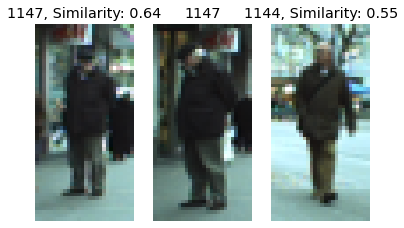

<Figure size 432x288 with 0 Axes>

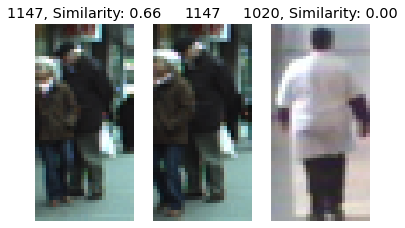

<Figure size 432x288 with 0 Axes>

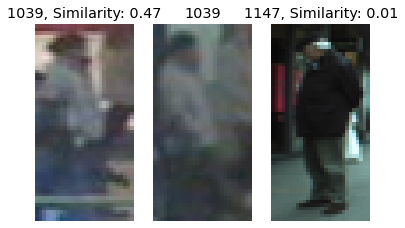

<Figure size 432x288 with 0 Axes>

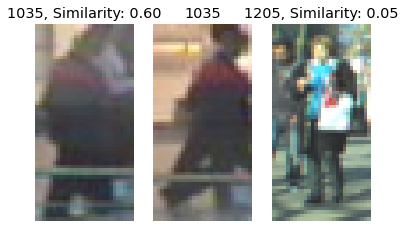

<Figure size 432x288 with 0 Axes>

In [ ]:
test_binary(binary_model, test_x, test_y, 10, random_ids)

(56, 28, 3)


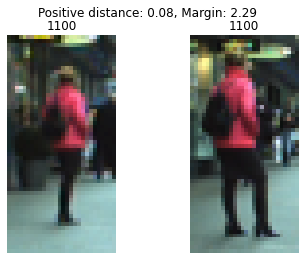

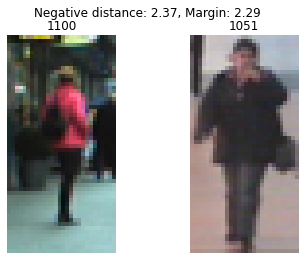

In [ ]:
#random_images = np.random.choice(len(test_x), size=(10,2))
random_id = np.random.choice(len(test_x), size=1)
#for i in range(len(random_images)):
#idxA = random_images[i][0]
#idxB = random_images[i][1]

imgA = test_x[random_id[0]]#test_x[idxA]
label = test_y[random_id[0]]
pos = np.where(test_y==label)
pos = np.random.choice(pos[0], size=1)
neg = np.where(test_y!=label)
neg = np.random.choice(neg[0], size=1)
imgB = test_x[pos[0]]#test_x[idxB]
imgC = test_x[neg[0]]

imgA_ = np.expand_dims(imgA, axis=0)
imgB_ = np.expand_dims(imgB, axis=0)
imgC_ = np.expand_dims(imgC, axis=0)
print(imgA.shape)

y_pred = model.predict([imgA_, imgB_, imgC_])
anchor, positive, negative = y_pred[:,:emb_size], y_pred[:,emb_size:2*emb_size], y_pred[:,2*emb_size:]
positive_dist = tf.reduce_mean(tf.square(anchor - positive), axis=1)
negative_dist = tf.reduce_mean(tf.square(anchor - negative), axis=1)

positive_dist = np.array(positive_dist)[0]
negative_dist = np.array(negative_dist)[0]
margin = negative_dist - positive_dist

# initialize the figure
plt.figure("Pair #{}".format(i + 1))
plt.suptitle("Positive distance: {:.2f}, Margin: {:.2f}".format(positive_dist, margin))
# show first image
plt.subplot(1,2,1)
plt.imshow(denormalize(imgA))
plt.title(test_y[random_id[0]])
plt.axis("off")
# show the second image
plt.subplot(1,2,2)
plt.imshow(denormalize(imgB))
plt.title(test_y[pos[0]])
plt.axis("off")
plt.show()

plt.figure("Pair #{}".format(i + 1))
plt.suptitle("Negative distance: {:.2f}, Margin: {:.2f}".format(negative_dist, margin))
# show first image
plt.subplot(1,2,1)
plt.imshow(denormalize(imgA))
plt.title(test_y[random_id[0]])
plt.axis("off")
# show the second image
plt.subplot(1,2,2)
plt.imshow(denormalize(imgC))
plt.title(test_y[neg[0]])
plt.axis("off")
# show the plot
plt.show()

In [ ]:
np.array(positive_dist)[0]

0.03262104

In [ ]:
from scipy.spatial import distance

def test_model(model, images, labels):

  labels = []
  preds = []
  for i in range(len(images)):
    anchor = images[i]
    label = labels[i]

    pos_labels = np.where(labels==label)
    neg_labels = np.where(labels!=label)

    neg = np.random.choice(pos_labels[0], size=1)
    pos = np.random.choice(neg_labels[0], size=1)

    positive = images[pos[0]]
    negative = images[neg[0]]

    anchor_emb = model.predict(anchor)
    positive_emb = model.predict(positive)
    negative_emb = model.predict(negative)

    pos_dst = distance.euclidean(anchor_emb, positive_emb)
    neg_dst = distance.euclidean(anchor_emb, negative_emb)

    

